In [16]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
data=pd.read_csv('/Users/saketmanolkar/Downloads/Dataset1.csv')
data
      

Phone Usage  Income_Source Living_Place Current_Carrier Change_Plan
0         >150              1         Town            AT&T         Yes
1          <75              1         Town            AT&T          No
2          <75              2         City          Sprint          No
3     75...150              2         City             MCI         Yes
4     75...150              2         City          Sprint         Yes
5     75...150              1         Town             MCI         Yes
6     75...150              2         City            AT&T         Yes
7          <75              1         City          Sprint          No
8         >150              1         City             MCI         Yes
9          <75              2         Town            AT&T          No
10        >150              2         Town          Sprint         Yes
11        >150              2         Town             MCI         Yes
12    75...150              2         Town             MCI         Yes
13        >150              2         City            AT&T          No
14        >150              2         City             MCI          No
15    75...150              2         Town            AT&T          No

In [17]:
#This pice of code encodes all the string into binary
#Conversion of string to binary allows us to process data effectively
for col in data.dtypes[data.dtypes=="object"].index:
    for_dummy= data.pop(col)
    data=pd.concat([data,pd.get_dummies(for_dummy,prefix=col)],axis=1)
    print(data)

    Income_Source Living_Place Current_Carrier Change_Plan  \
0               1         Town            AT&T         Yes   
1               1         Town            AT&T          No   
2               2         City          Sprint          No   
3               2         City             MCI         Yes   
4               2         City          Sprint         Yes   
5               1         Town             MCI         Yes   
6               2         City            AT&T         Yes   
7               1         City          Sprint          No   
8               1         City             MCI         Yes   
9               2         Town            AT&T          No   
10              2         Town          Sprint         Yes   
11              2         Town             MCI         Yes   
12              2         Town             MCI         Yes   
13              2         City            AT&T          No   
14              2         City             MCI          No   
15      

In [18]:
#We define the coloumn "Change_Plan_No" in our dataset as the label for the model
labels=data.pop("Change_Plan_No")

In [19]:
#This particular library allows us to split training dataset from the test dataset
#Here the test dataset size is set at 50 percent 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(data,labels,test_size = 0.20)


In [20]:
#rf is defined as the funciontion RandomForestClassifier() 
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [21]:
y_pred=rf.predict(x_test)

0.8333333333333333

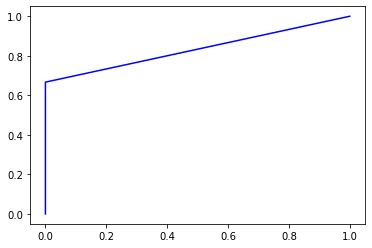

In [22]:
#roc_curve,auc is used to calculate ROC and area under the curve for Random Forrest 
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds =roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b')
t=roc_auc

t

In [23]:
#Classifier is defined as the funciontion KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=6)
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [24]:
y_pred = classifier.predict(x_test)

0.6666666666666666

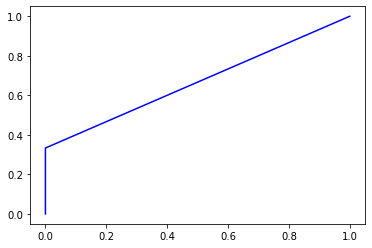

In [25]:
#roc_curve,auc is used to calculate ROC and area under the curve for KNN
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds =roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b')
u=roc_auc
u

In [26]:
#lstm is defined as the funciontion MLPClassifier
from sklearn.neural_network import MLPClassifier
lstm=MLPClassifier(solver="lbfgs",alpha=1e-5,hidden_layer_sizes=(5,2),random_state=1)
lstm.fit(x_train,y_train)


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [27]:
y_pred=lstm.predict(x_test)


0.5

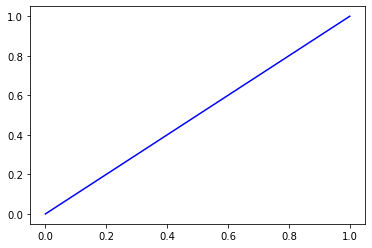

In [28]:
#roc_curve,auc is used to calculate ROC and area under the curve of LSTM
from sklearn.metrics import roc_curve,auc
false_positive_rate,true_positive_rate,thresholds =roc_curve(y_test,y_pred)
roc_auc=auc(false_positive_rate,true_positive_rate)
plt.plot(false_positive_rate, true_positive_rate, 'b')
v=roc_auc
v

The highest accuracy amongst all the algorithm is: 0.8333333333333333


Algorithm  Accuracy
0  Random Forrest  0.833333
1             KNN  0.666667
2            LSTM  0.500000

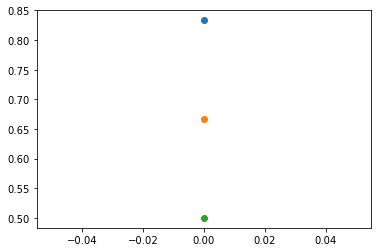

In [29]:
plt.plot(t,"o")
plt.plot(u,"o")
plt.plot(v,"o")
data = [["Random Forrest",t], ["KNN", u],["LSTM",v]]
data1 = pd.DataFrame(data, columns=["Algorithm", "Accuracy"])
print("The highest accuracy amongst all the algorithm is:", data1["Accuracy"].max())
data1